In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (20, 15)
plt.rcParams['figure.dpi'] = 350
sns.set_style(style='darkgrid')
plt.tight_layout()



<Figure size 7000x5250 with 0 Axes>

#1. Data Exploration:

a. Load the dataset and perform exploratory data analysis (EDA).


In [105]:
titanic_data = pd.read_csv('Titanic_train.csv') #loading train dataset
titanic_data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [106]:
titanic_test = pd.read_csv('Titanic_test.csv') #loading test dataset
titanic_test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

b. Examine the features, their types, and summary statistics.

In [107]:
titanic_data.info() #information about train dataset to identify the data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [108]:
titanic_test.info() #information about test dataset to identify the data types


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [109]:
titanic_data.describe() # statistical information for the given train dataset

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [110]:
titanic_test.describe() # statistical information for the given test dataset

PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209    0.896760    0.981429   55.907576
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   21.000000    0.000000    0.000000    7.895800
50%    1100.500000    3.000000   27.000000    0.000000    0.000000   14.454200
75%    1204.750000    3.000000   39.000000    1.000000    0.000000   31.500000
max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200

In [111]:
# identify and storing numerical and categorical columns separately from the given dataset
numerical_columns = titanic_data.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = titanic_data.select_dtypes(include=['object']).columns


In [112]:
# identify and storing numerical and categorical columns separately from the given test dataset
t_numerical_columns = titanic_test.select_dtypes(include=['int64', 'float64']).columns
t_categorical_columns = titanic_test.select_dtypes(include=['object']).columns

c. Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.

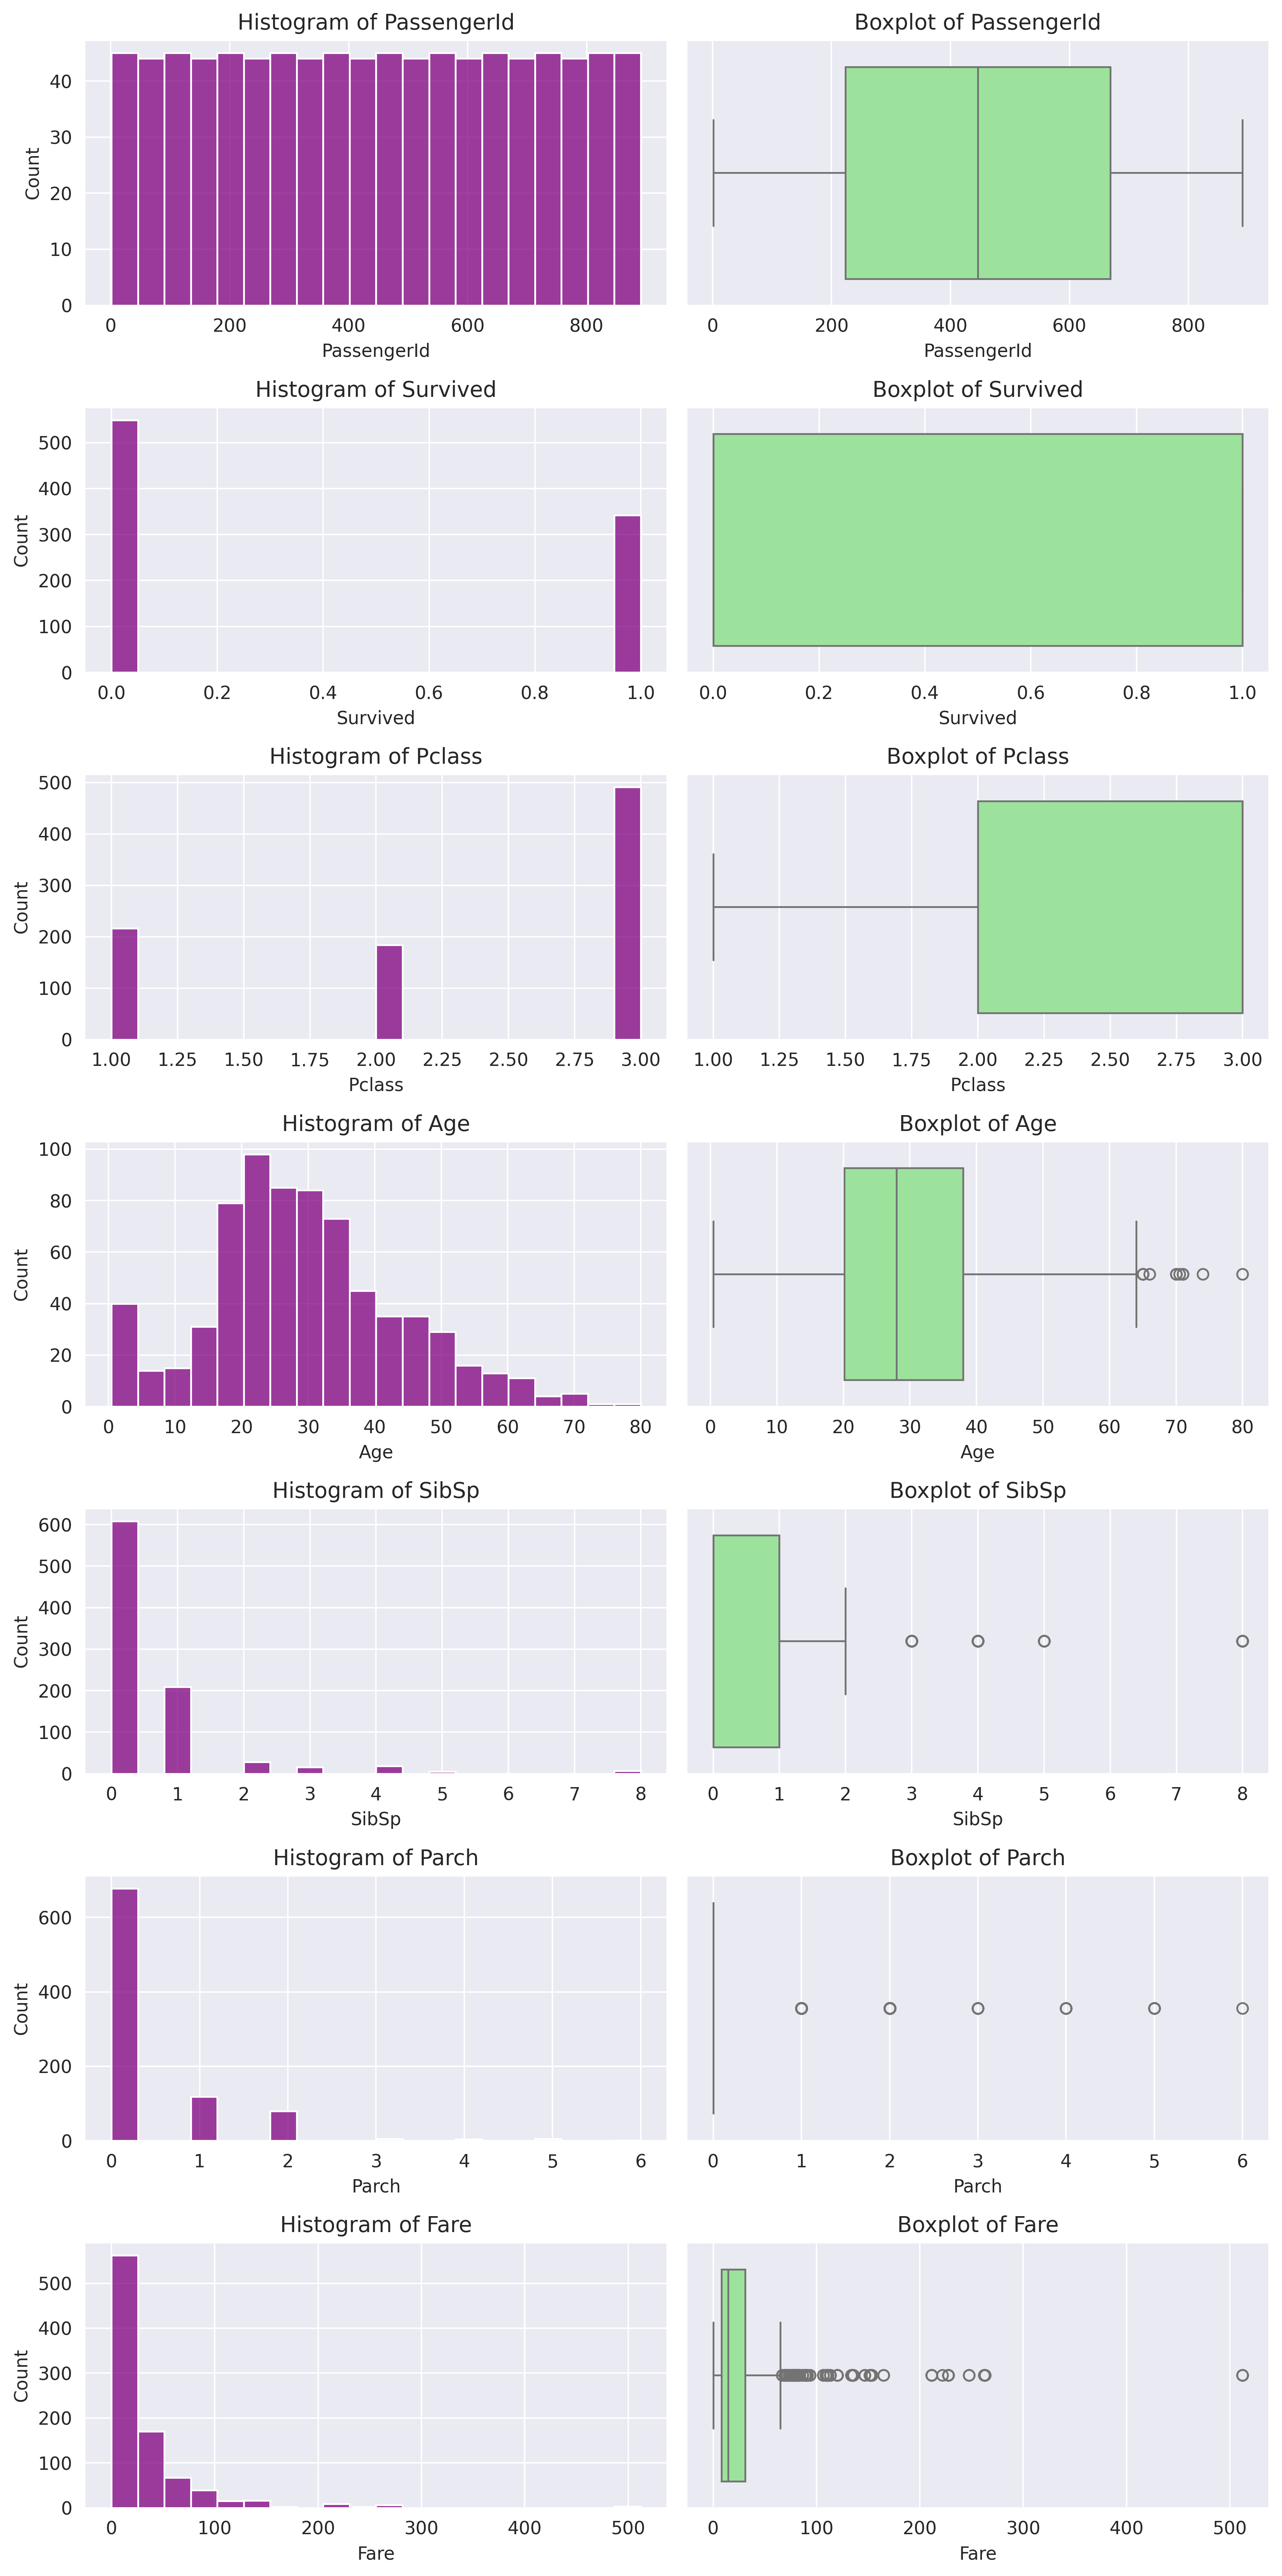

In [113]:
# Histograms and boxplot for train data
fig, axes = plt.subplots(len(numerical_columns), 2, figsize=(10, 20))
for i, col in enumerate(numerical_columns):
    sns.histplot(titanic_data[col], bins=20, ax=axes[i, 0], color='purple')
    axes[i, 0].set_title(f'Histogram of {col}')
    sns.boxplot(x=titanic_data[col], ax=axes[i, 1], color='lightgreen')
    axes[i, 1].set_title(f'Boxplot of {col}')
plt.tight_layout()



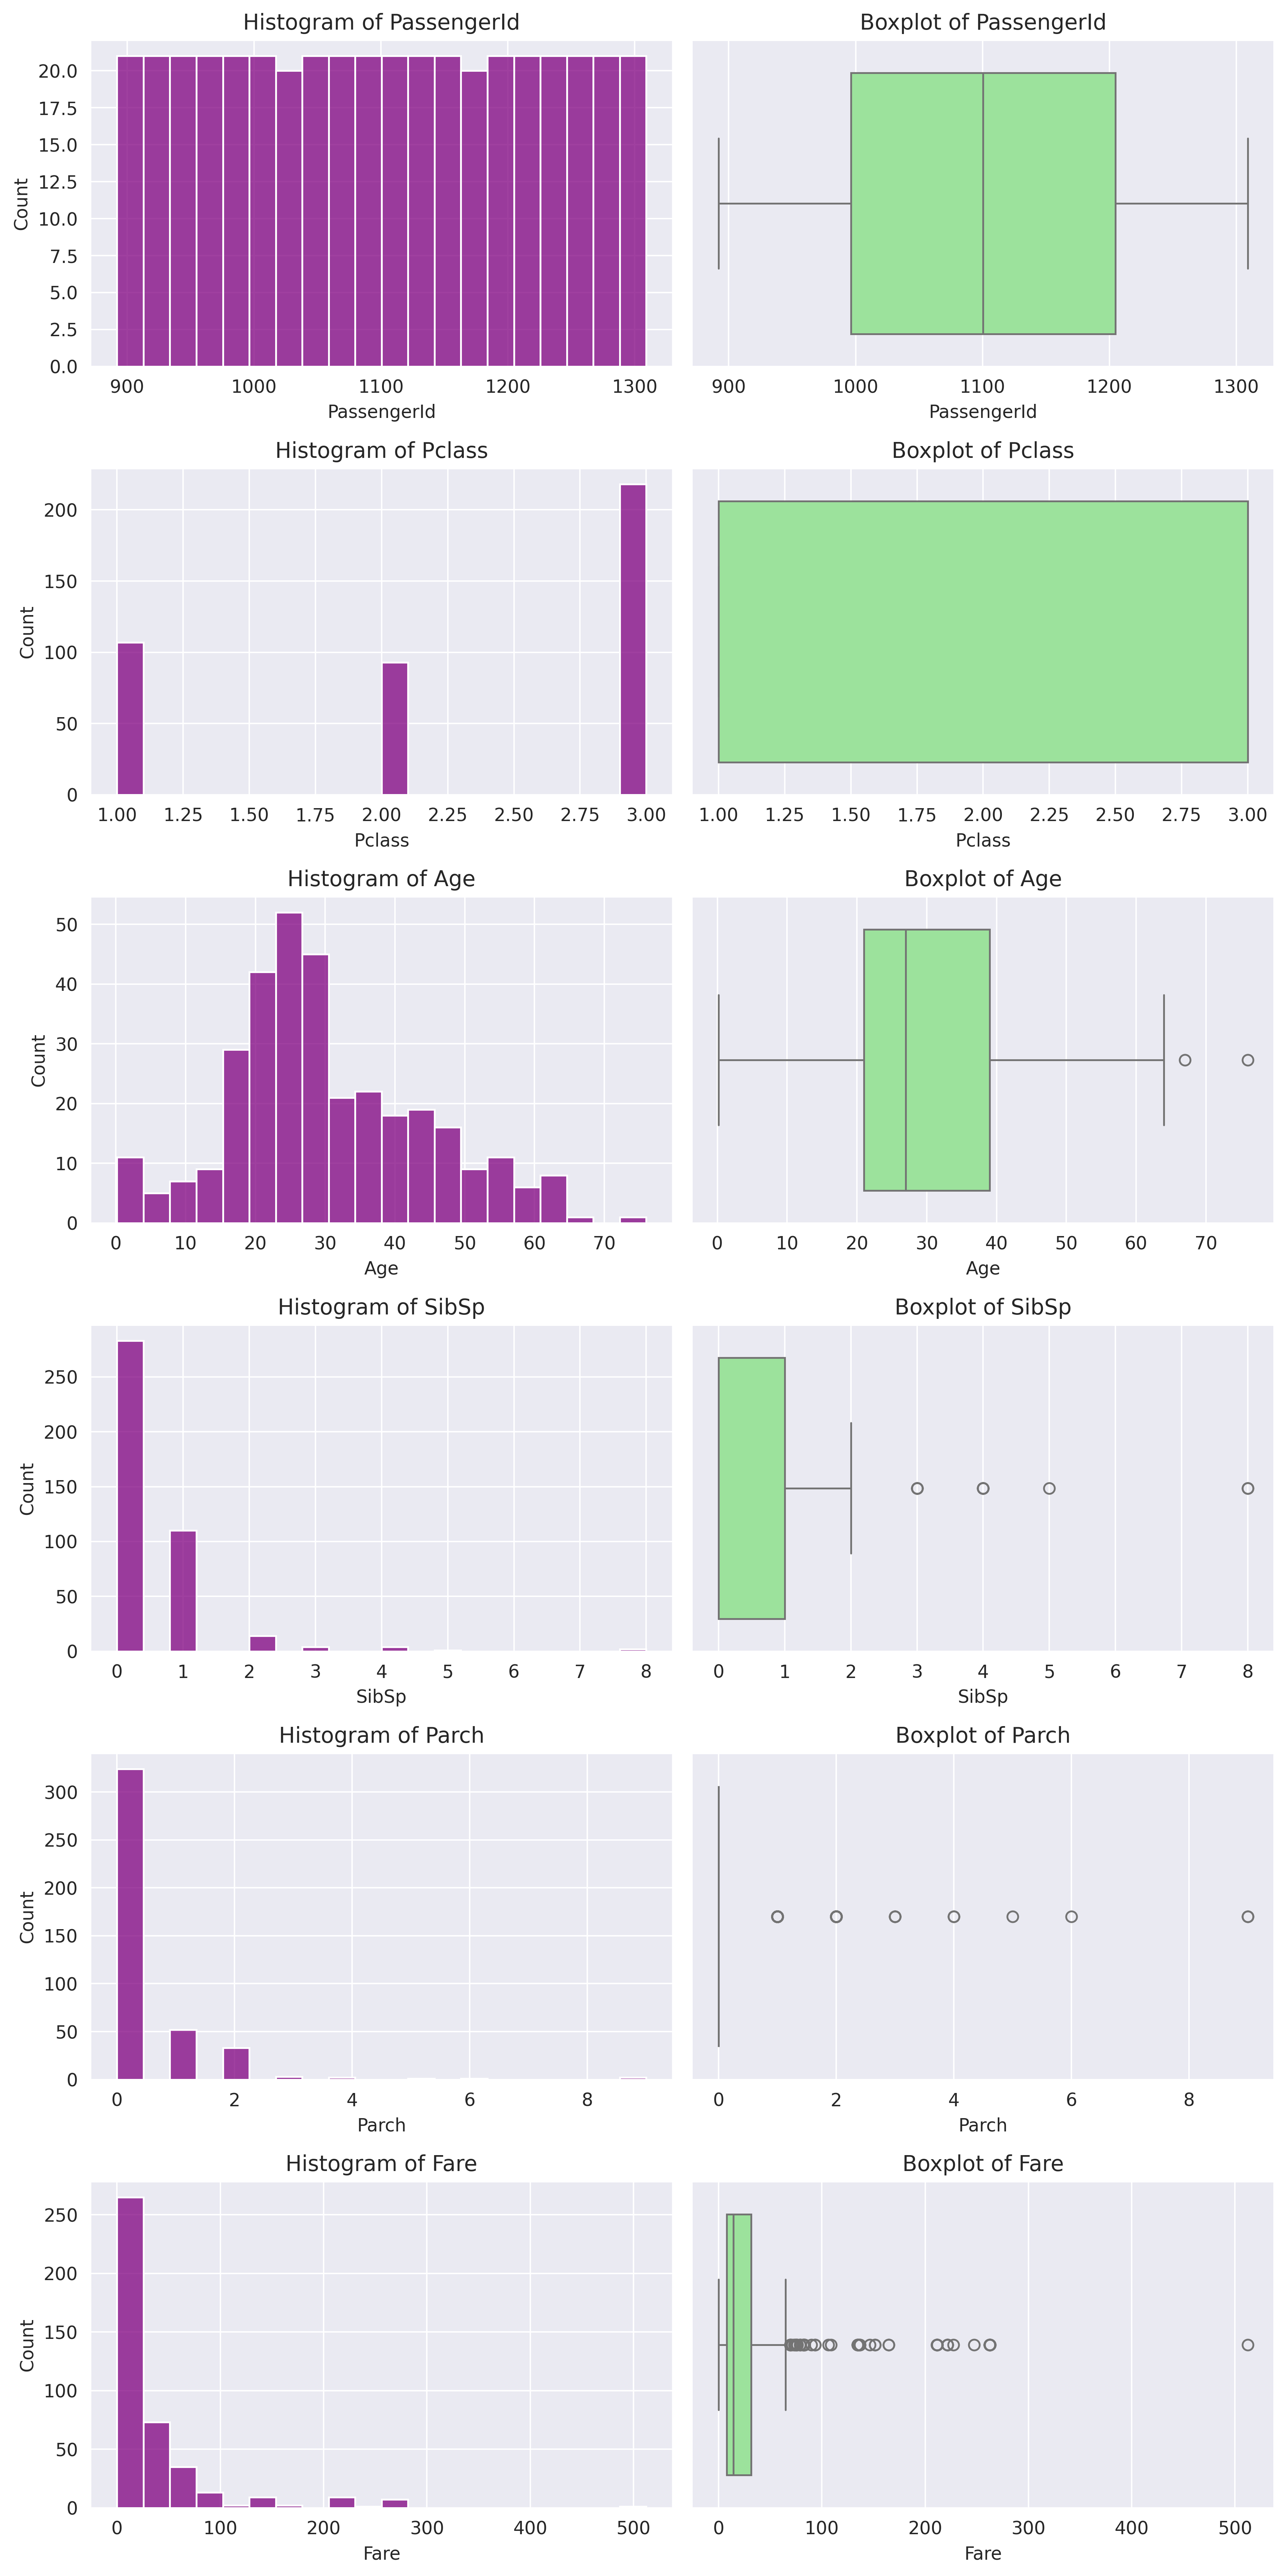

In [114]:
# Histograms and boxplot for test data
fig, axes = plt.subplots(len(t_numerical_columns), 2, figsize=(10, 20))
for i, col in enumerate(t_numerical_columns):
    sns.histplot(titanic_test[col], bins=20, ax=axes[i, 0], color='purple')
    axes[i, 0].set_title(f'Histogram of {col}')
    sns.boxplot(x=titanic_test[col], ax=axes[i, 1], color='lightgreen')
    axes[i, 1].set_title(f'Boxplot of {col}')
plt.tight_layout()

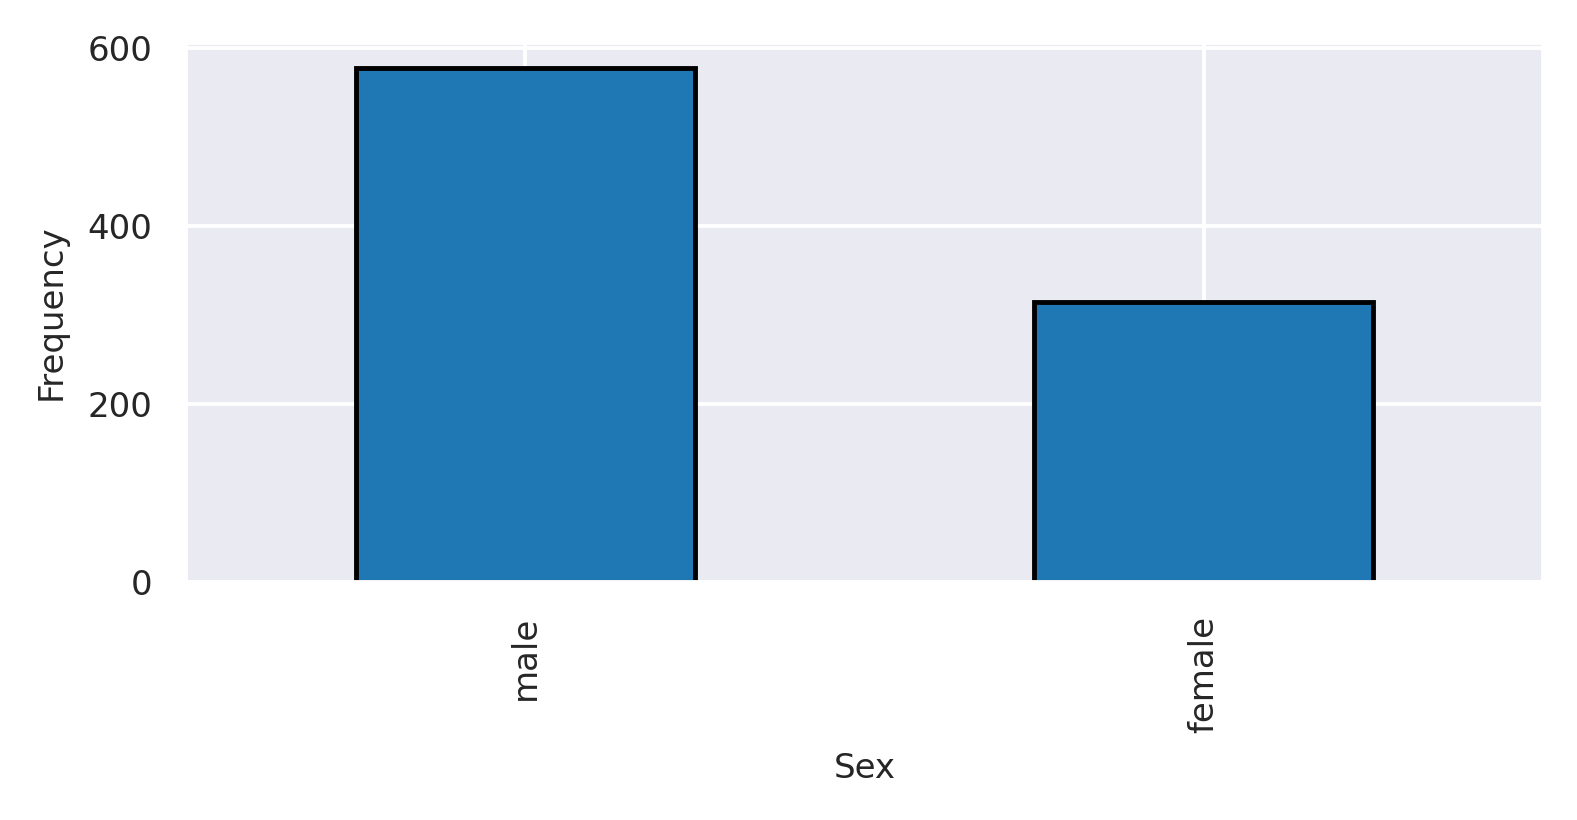

In [115]:
# Bar charts for categorical columns for train data
col='Sex'
plt.figure(figsize=(5, 2))
titanic_data[col].value_counts().plot(kind='bar',edgecolor ='black')
plt.xlabel(col,fontsize=7)
plt.xticks(fontsize=7)
plt.ylabel('Frequency',fontsize=7)
plt.yticks(fontsize=7)
plt.show()

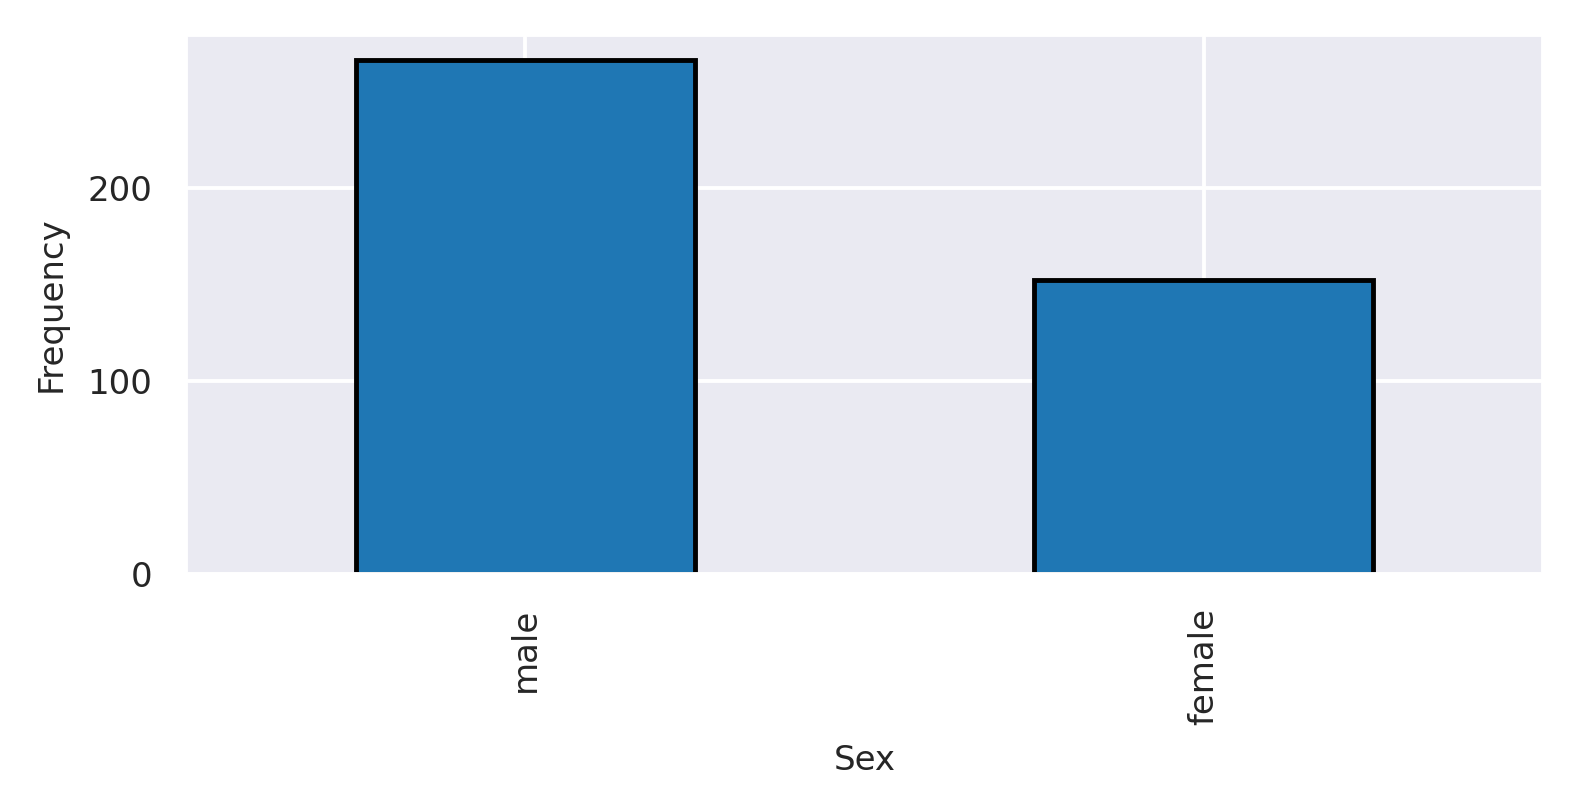

In [116]:
# Bar charts for categorical columns for test data
col='Sex'
plt.figure(figsize=(5, 2))
titanic_test[col].value_counts().plot(kind='bar',edgecolor ='black')
plt.xlabel(col,fontsize=7)
plt.xticks(fontsize=7)
plt.ylabel('Frequency',fontsize=7)
plt.yticks(fontsize=7)
plt.show()

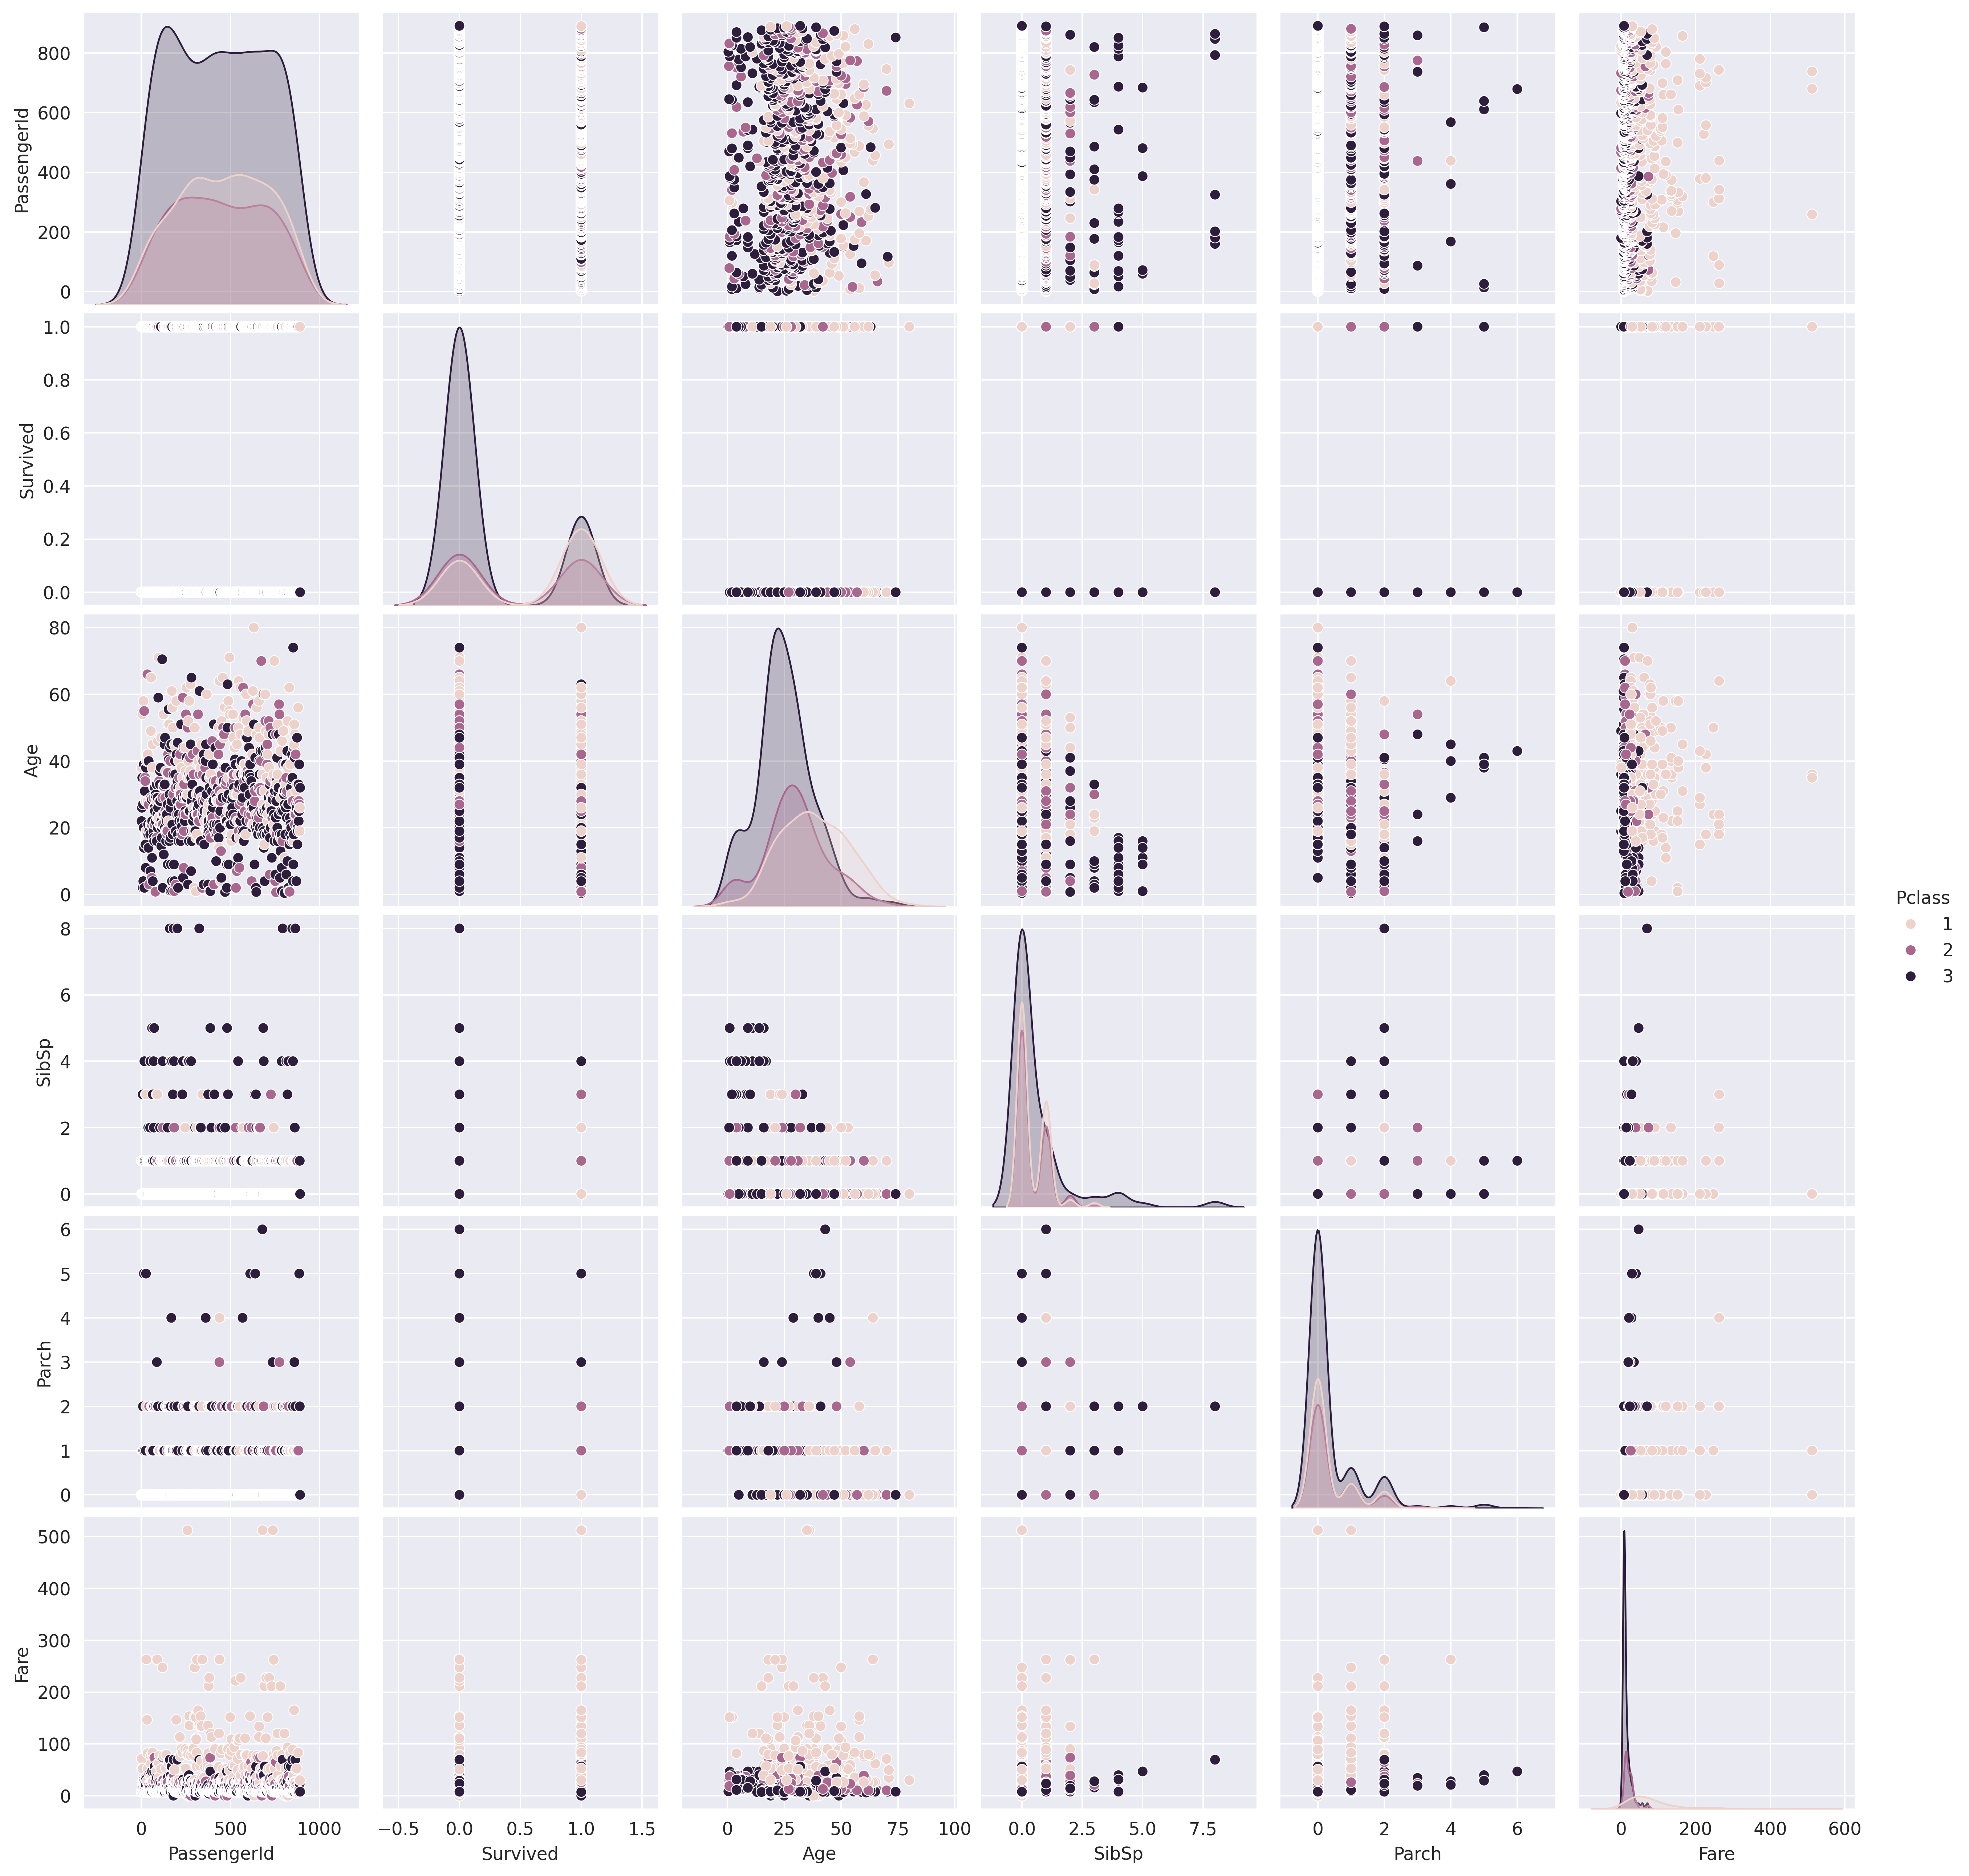

In [117]:
sns.pairplot(titanic_data,  hue ='Pclass') #pairplot of given features by passanger class for train data

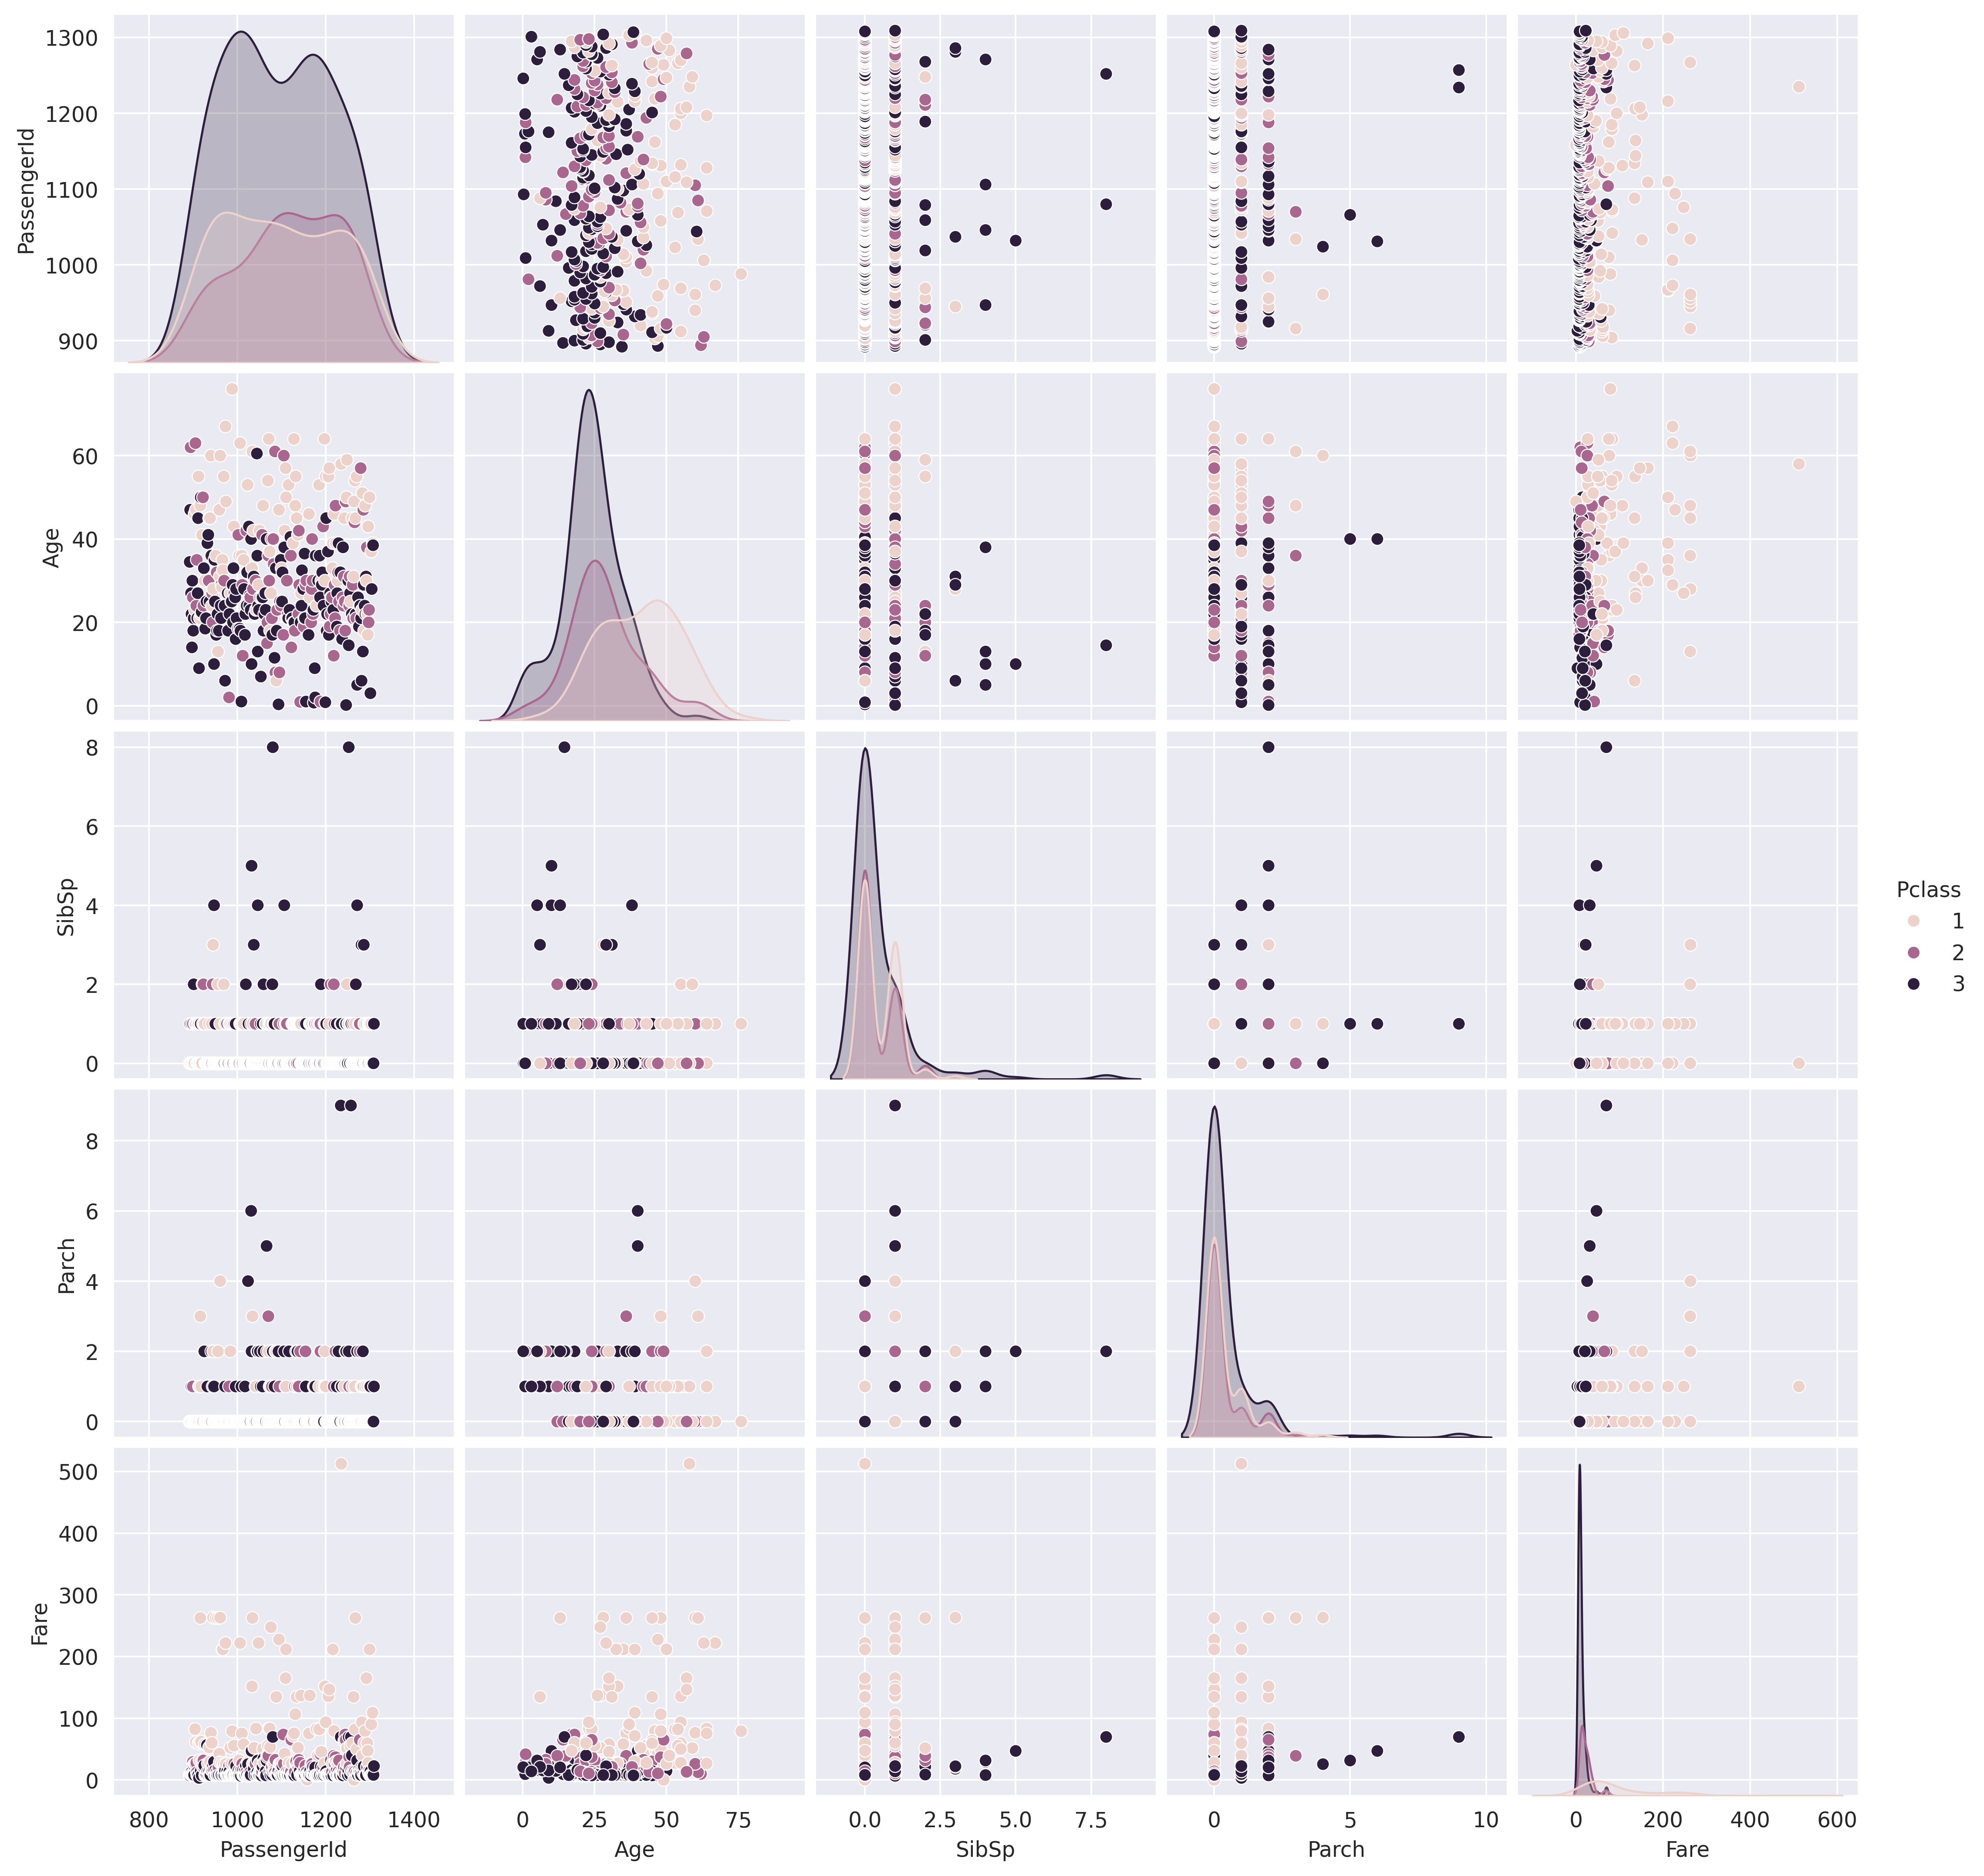

In [118]:
sns.pairplot(titanic_test,  hue ='Pclass') #pairplot of given features by passanger class for train data

Analyze any patterns or correlations observed in the data.

In [119]:
titanic_data[numerical_columns].corr() #correlation matrix for train dataset

PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000

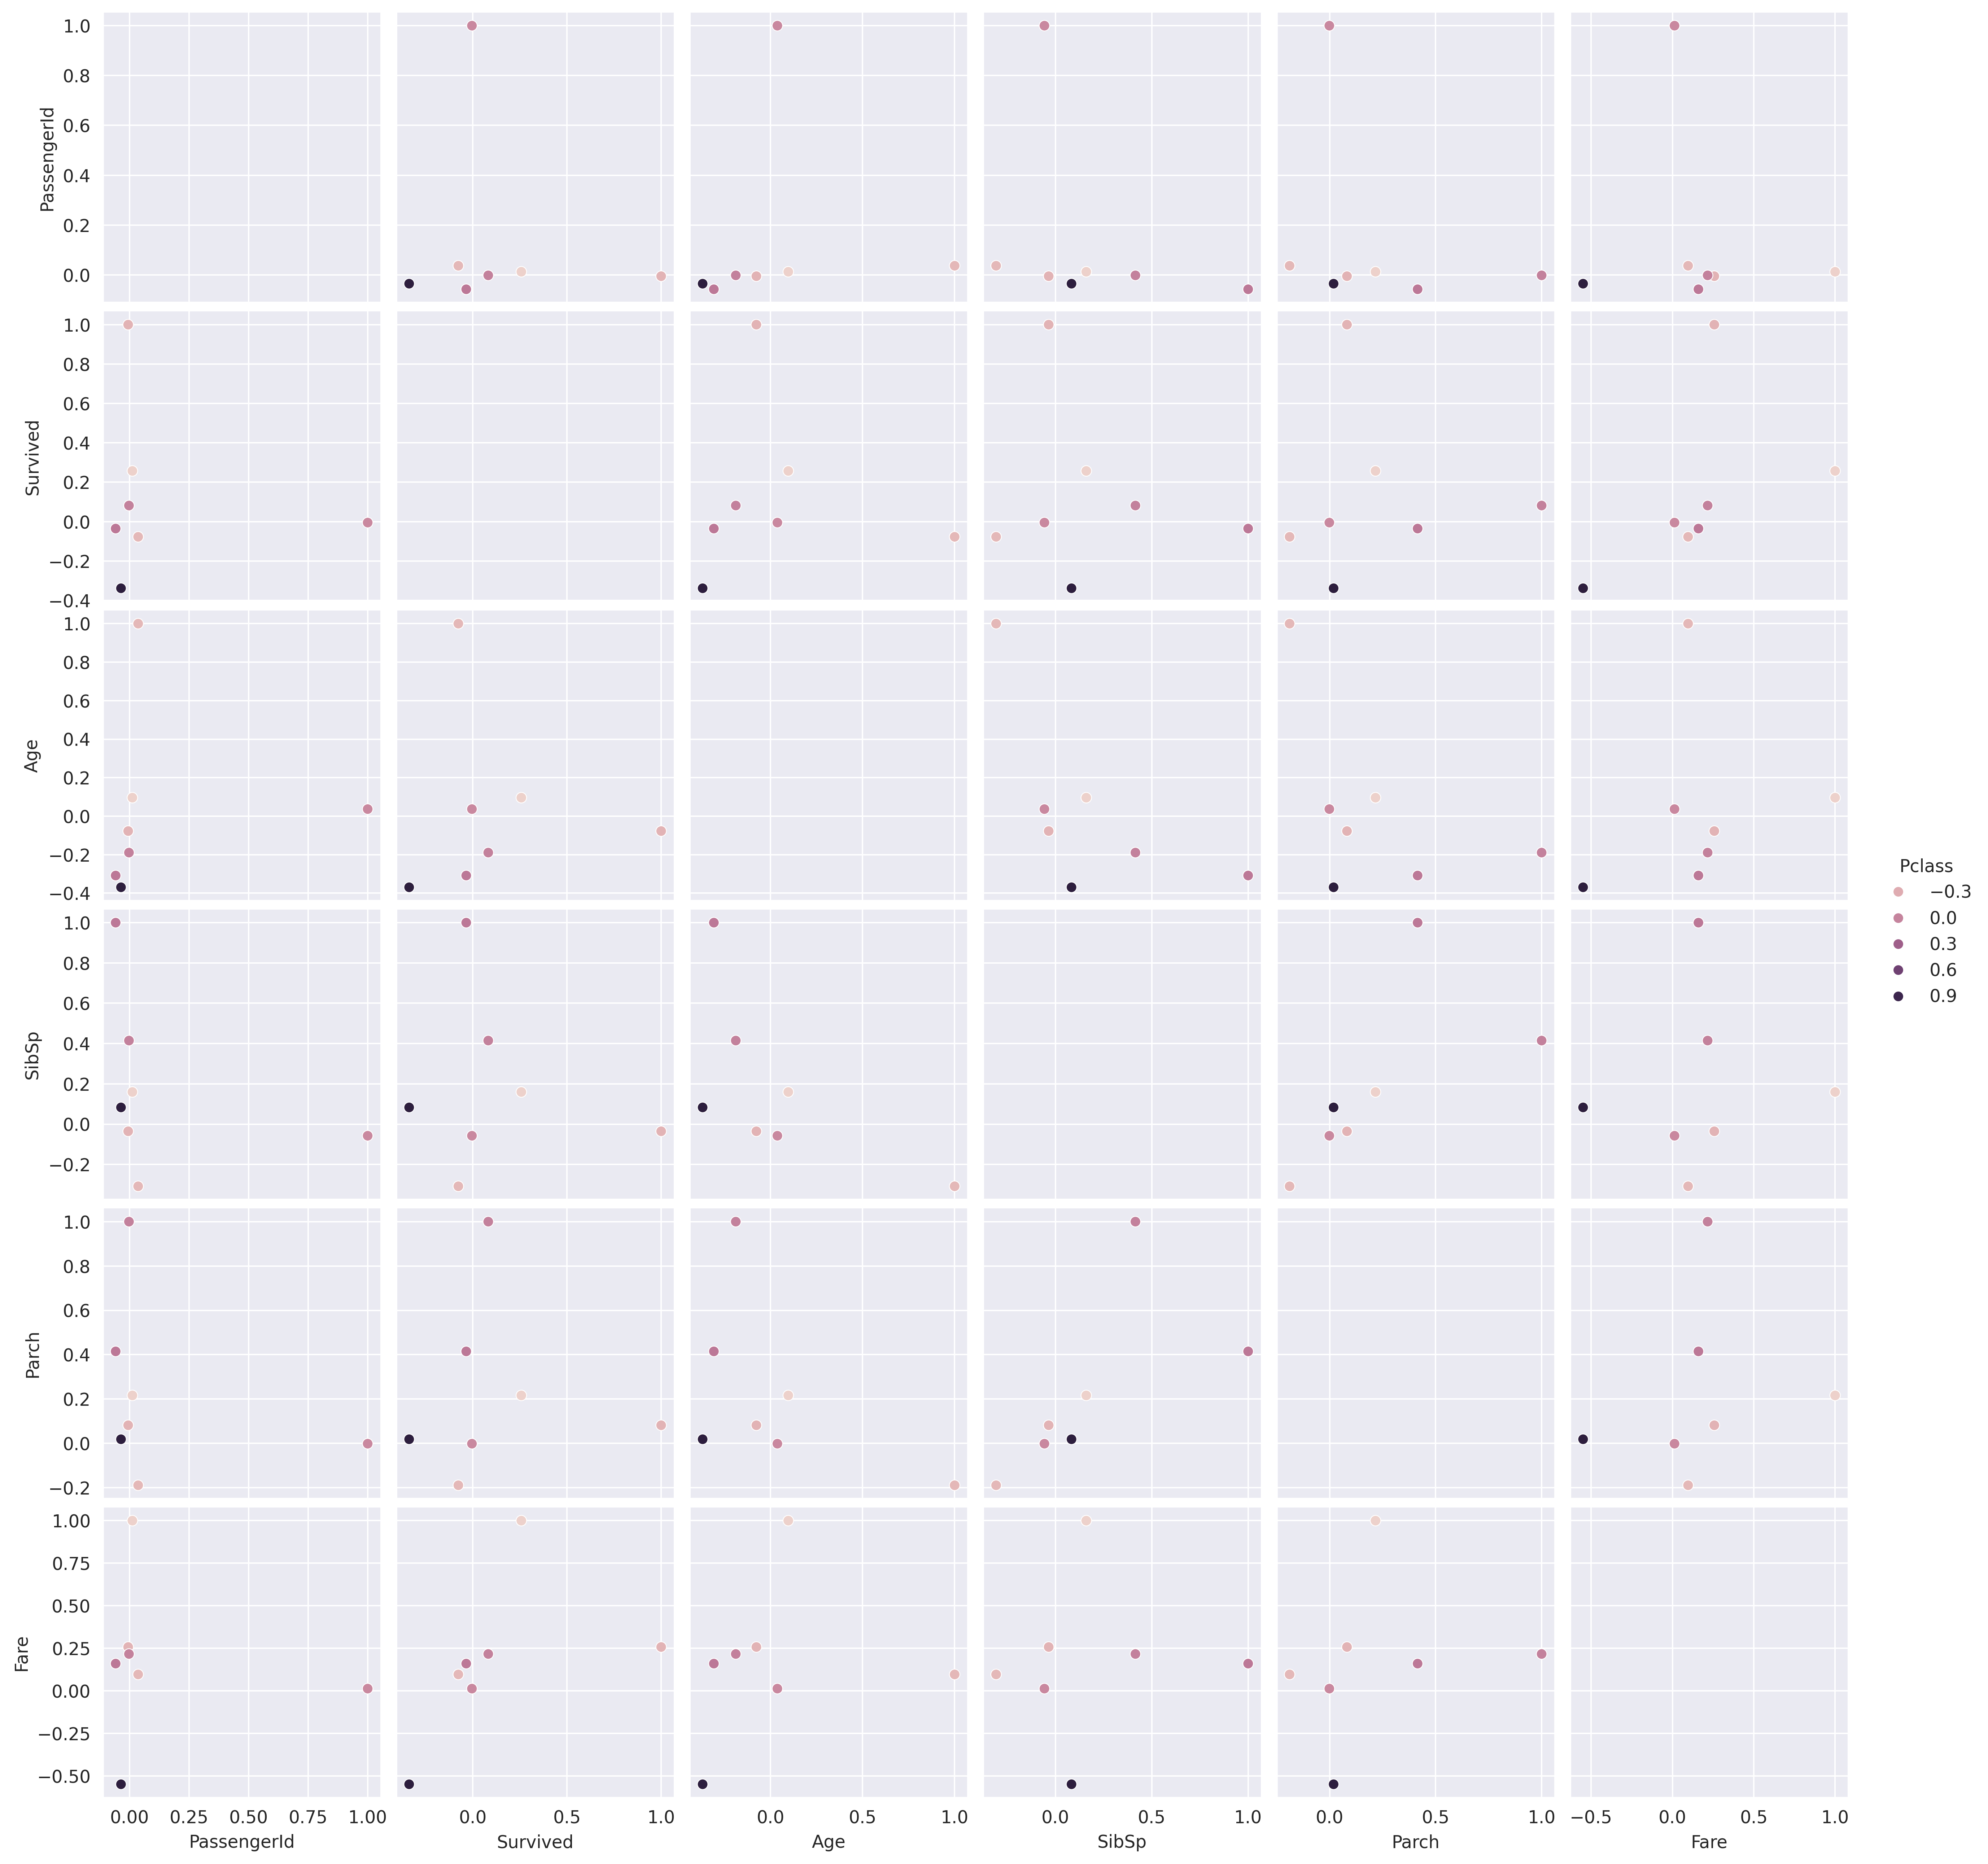

In [120]:
sns.pairplot(titanic_data[numerical_columns].corr(),  hue ='Pclass') #pairplot of given features by passanger class for train data
plt.show()

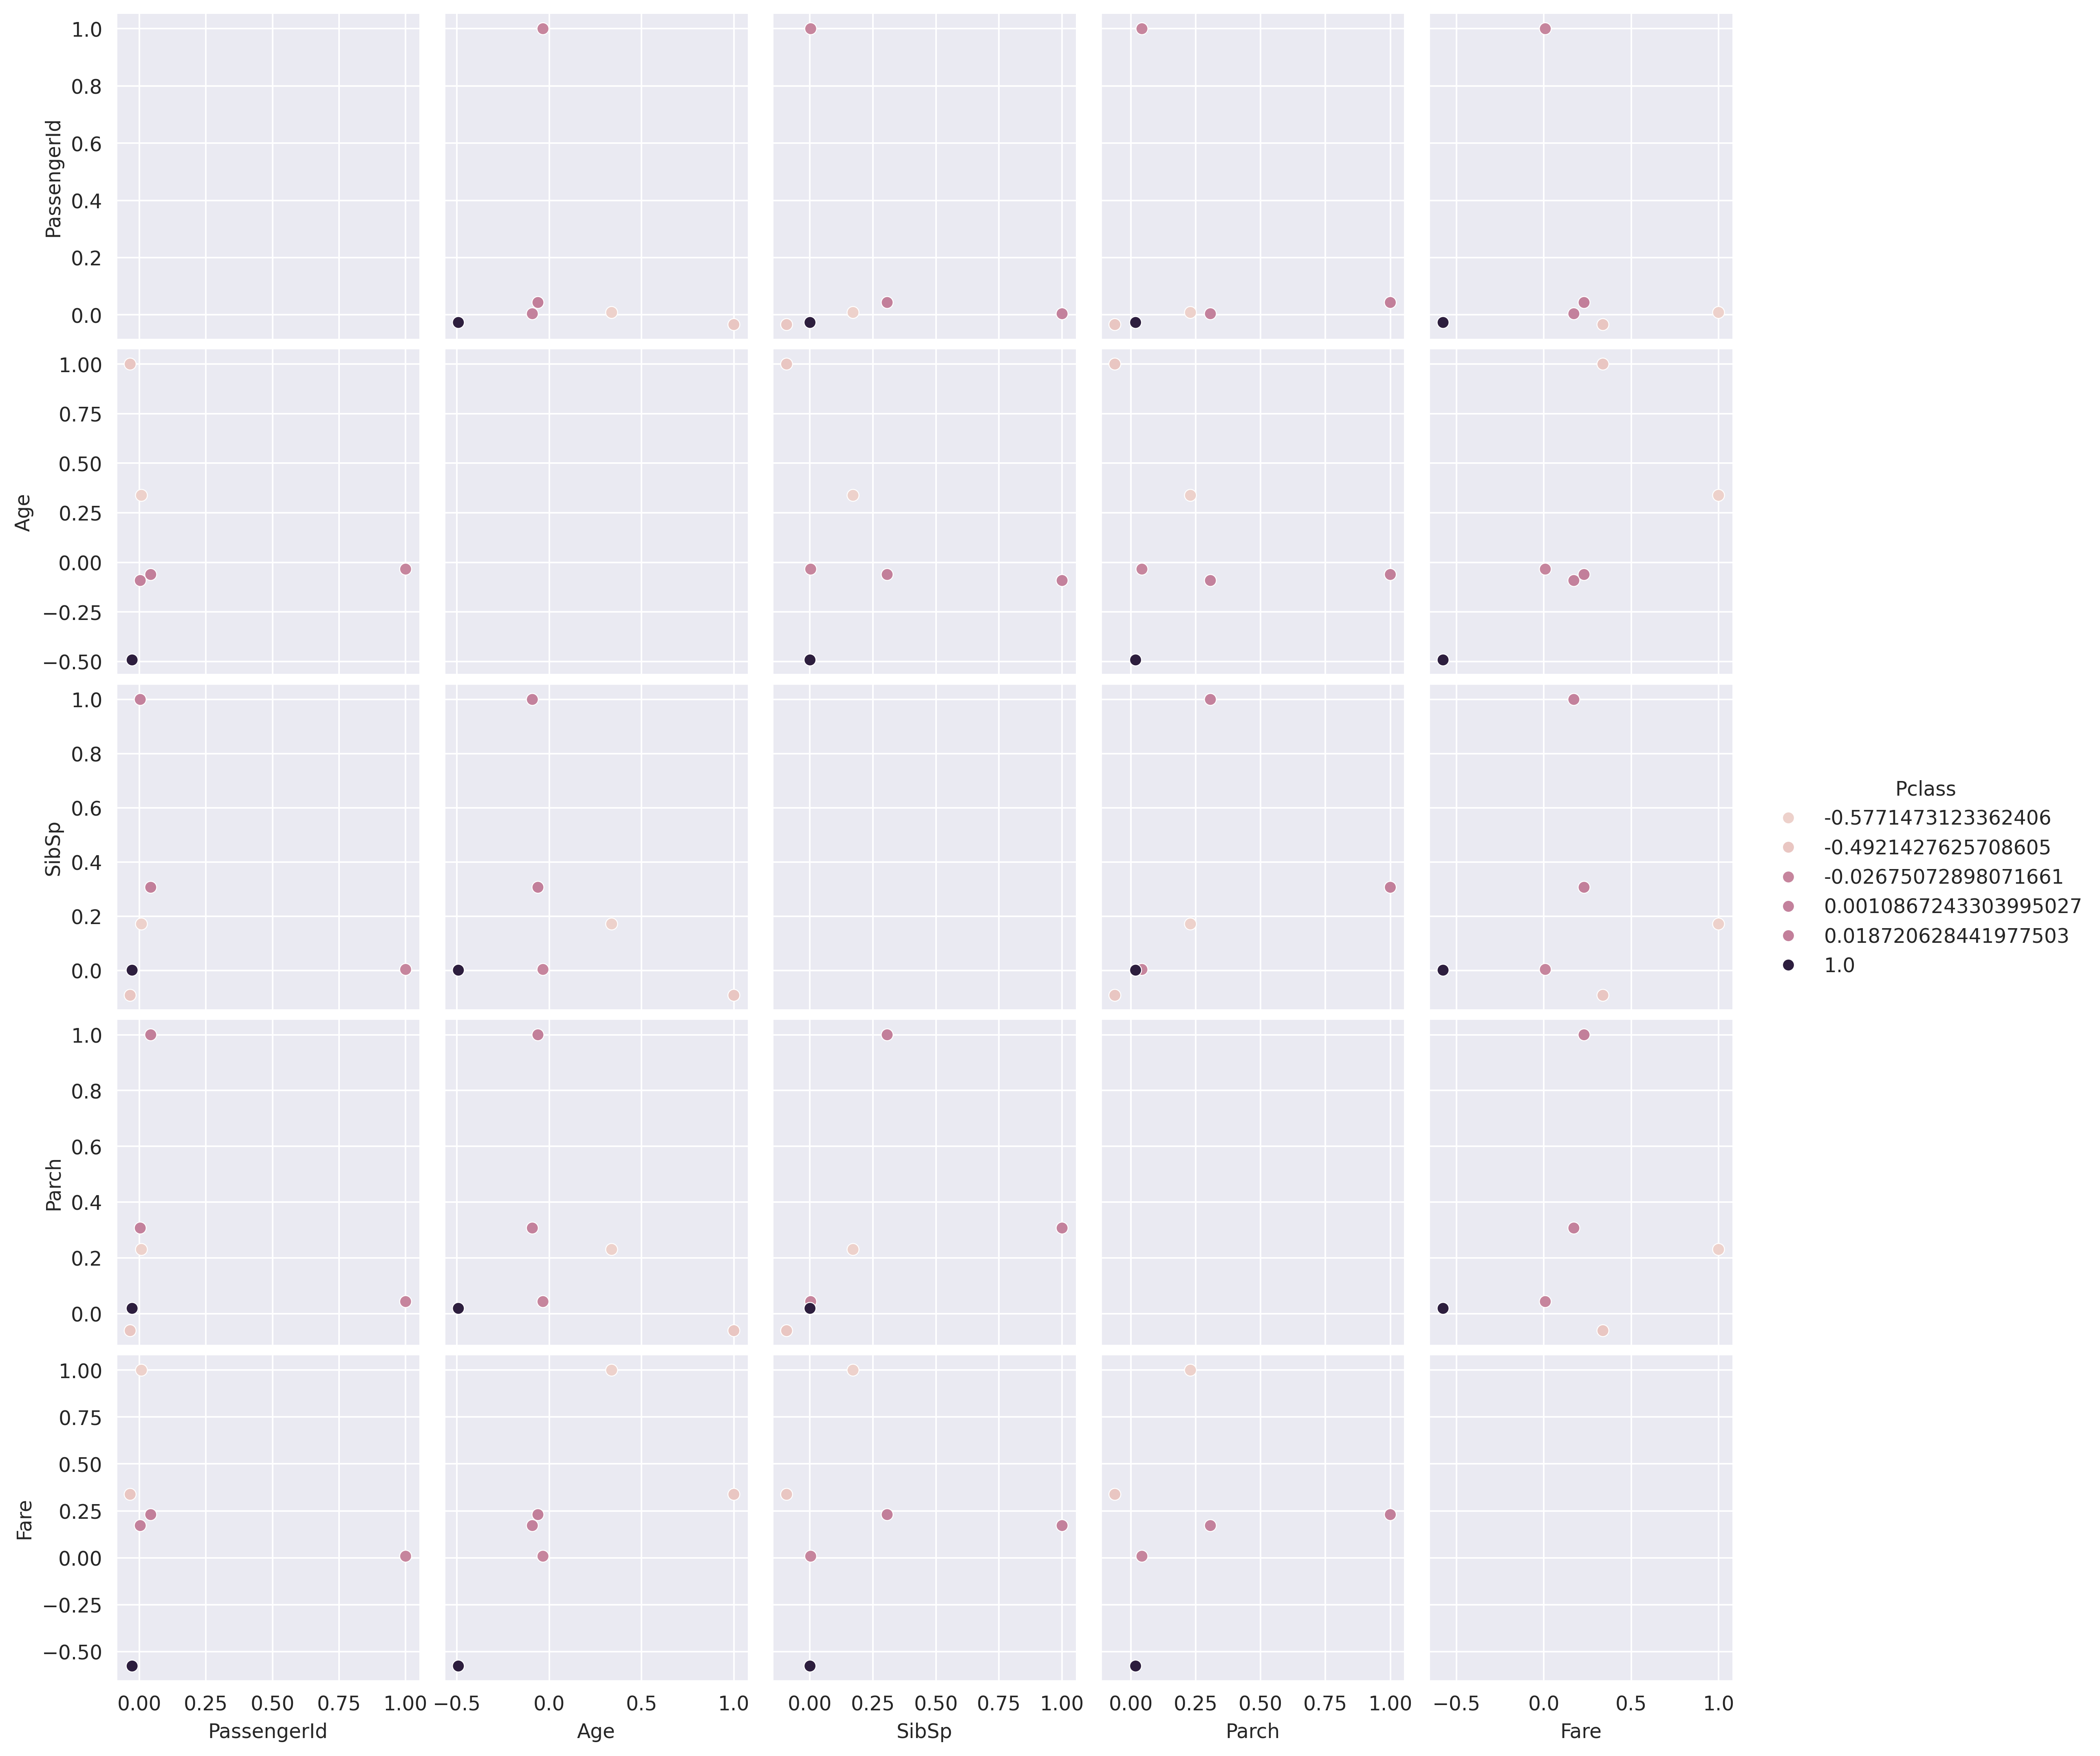

In [121]:
sns.pairplot(titanic_test[t_numerical_columns].corr(),  hue ='Pclass') #pairplot of given features by passanger class for test data
plt.show()

max no of columns are categorical columns.
All columns have numeric values except sex and embarked.
correlation between the Pclass and Fare indicates - higher classes generally paid more for their tickets.

# 2. Data Preprocessing:

a. Handle missing values (e.g., imputation).

In [122]:
titanic_data.isnull().sum() #find the sum of missing values for train dataset


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [123]:
titanic_test.isnull().sum() #find the sum of missing values for test dataset


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [124]:
titanic_data['Age'].fillna(titanic_data['Age'].median(),inplace=True) #replacing missing values with mean in age column
titanic_data['Age'].isna().sum()

0

In [125]:
titanic_test['Age'].fillna(titanic_data['Age'].median(),inplace=True) #replacing missing values with mean in age column
titanic_test['Age'].isna().sum()

0

In [126]:
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0],inplace=True) #replacing missing values with mode in embarked column
titanic_data['Embarked'].isna().sum()


0

In [127]:
titanic_test['Embarked'].fillna(titanic_data['Embarked'].mode()[0],inplace=True) #replacing missing values with mode in embarked column
titanic_test['Embarked'].isna().sum()

0

In [128]:
 # Fill missing 'Fare' with median fare
titanic_test['Fare'] = titanic_test['Fare'].fillna(titanic_test['Fare'].median())
titanic_test['Fare'].isna().sum()

0

In [129]:
titanic_data = titanic_data.drop(columns=['PassengerId','Name','Ticket','Cabin']) # removing unnecessary columns because those are not useful in model building
titanic_data.head()

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S

In [130]:
titanic_test = titanic_test.drop(columns=['PassengerId','Name','Ticket','Cabin']) # removing unnecessary columns because those are not useful in model building
titanic_test.head()

Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0       3    male  34.5      0      0   7.8292        Q
1       3  female  47.0      1      0   7.0000        S
2       2    male  62.0      0      0   9.6875        Q
3       3    male  27.0      0      0   8.6625        S
4       3  female  22.0      1      1  12.2875        S

In [131]:
titanic_data.isnull().sum() #find the sum of missing values for test dataset

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

b. Encode categorical variables.

In [132]:
# Encoding the categorical columns using LabelEncoder for train data
label_enc = LabelEncoder()
titanic_data['Sex'] = label_enc.fit_transform(titanic_data['Sex'])
titanic_data['Embarked'] = label_enc.fit_transform(titanic_data['Embarked'])
titanic_data.head()

Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         0       3    1  22.0      1      0   7.2500         2
1         1       1    0  38.0      1      0  71.2833         0
2         1       3    0  26.0      0      0   7.9250         2
3         1       1    0  35.0      1      0  53.1000         2
4         0       3    1  35.0      0      0   8.0500         2

In [133]:
# Encoding the categorical columns using LabelEncoder
label_enc = LabelEncoder()
titanic_test['Sex'] = label_enc.fit_transform(titanic_test['Sex'])
titanic_test['Embarked'] = label_enc.fit_transform(titanic_test['Embarked'])
titanic_test.head()

Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0       3    1  34.5      0      0   7.8292         1
1       3    0  47.0      1      0   7.0000         2
2       2    1  62.0      0      0   9.6875         1
3       3    1  27.0      0      0   8.6625         2
4       3    0  22.0      1      1  12.2875         2

In [134]:
titanic_test.shape

(418, 7)

In [135]:
titanic_data.shape

(891, 8)

In [136]:
# Combine train and test data for consistent processing
combined_data = pd.concat([titanic_data, titanic_test], ignore_index=True, sort=False)

combined_data.head()

Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0       0.0       3    1  22.0      1      0   7.2500         2
1       1.0       1    0  38.0      1      0  71.2833         0
2       1.0       3    0  26.0      0      0   7.9250         2
3       1.0       1    0  35.0      1      0  53.1000         2
4       0.0       3    1  35.0      0      0   8.0500         2

#3. Model Building:

Build a logistic regression model using appropriate libraries (e.g., scikit-learn) and train the model using the training data.

In [137]:
# using sklearn library from python
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [138]:
# Separate combined data back into train and test datasets
train_processed = combined_data[:len(titanic_data)]
test_processed = combined_data[len(titanic_test):]

# Split data into features and target
X = train_processed.drop(columns=['Survived'])
y = train_processed['Survived']
t_X = test_processed.drop(columns=['Survived'])


# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)

# Predictions
y_pred = logistic_model.predict(X_test)
y_pred_prob = logistic_model.predict_proba(X_test)[:, 1]


#4. Model Evaluation:

Evaluate the performance of the model on the testing data using accuracy, precision, recall, F1-score, and ROC-AUC score.

In [139]:
# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")

Accuracy: 0.81
Precision: 0.79
Recall: 0.74
F1 Score: 0.76
ROC-AUC: 0.88


**Analysis:**

Accuracy: 81.01% - The proportion of correctly predicted instances.

Precision: 78.57% - The proportion of positive identifications that are actually correct.

Recall: 74.32% - The proportion of actual positives correctly identified.

F1-Score: 76.39% - The harmonic mean of precision and recall, balancing their trade-off.

ROC-AUC: 88.26% - Indicates the model's ability to distinguish between classes (higher is better).

Visualize the ROC curve.

Based on the grapgh between the true positive rate (sensitivity) and false positive rate, we can determine that the area under the curve (AUC = 0.8826) indicates high performance.

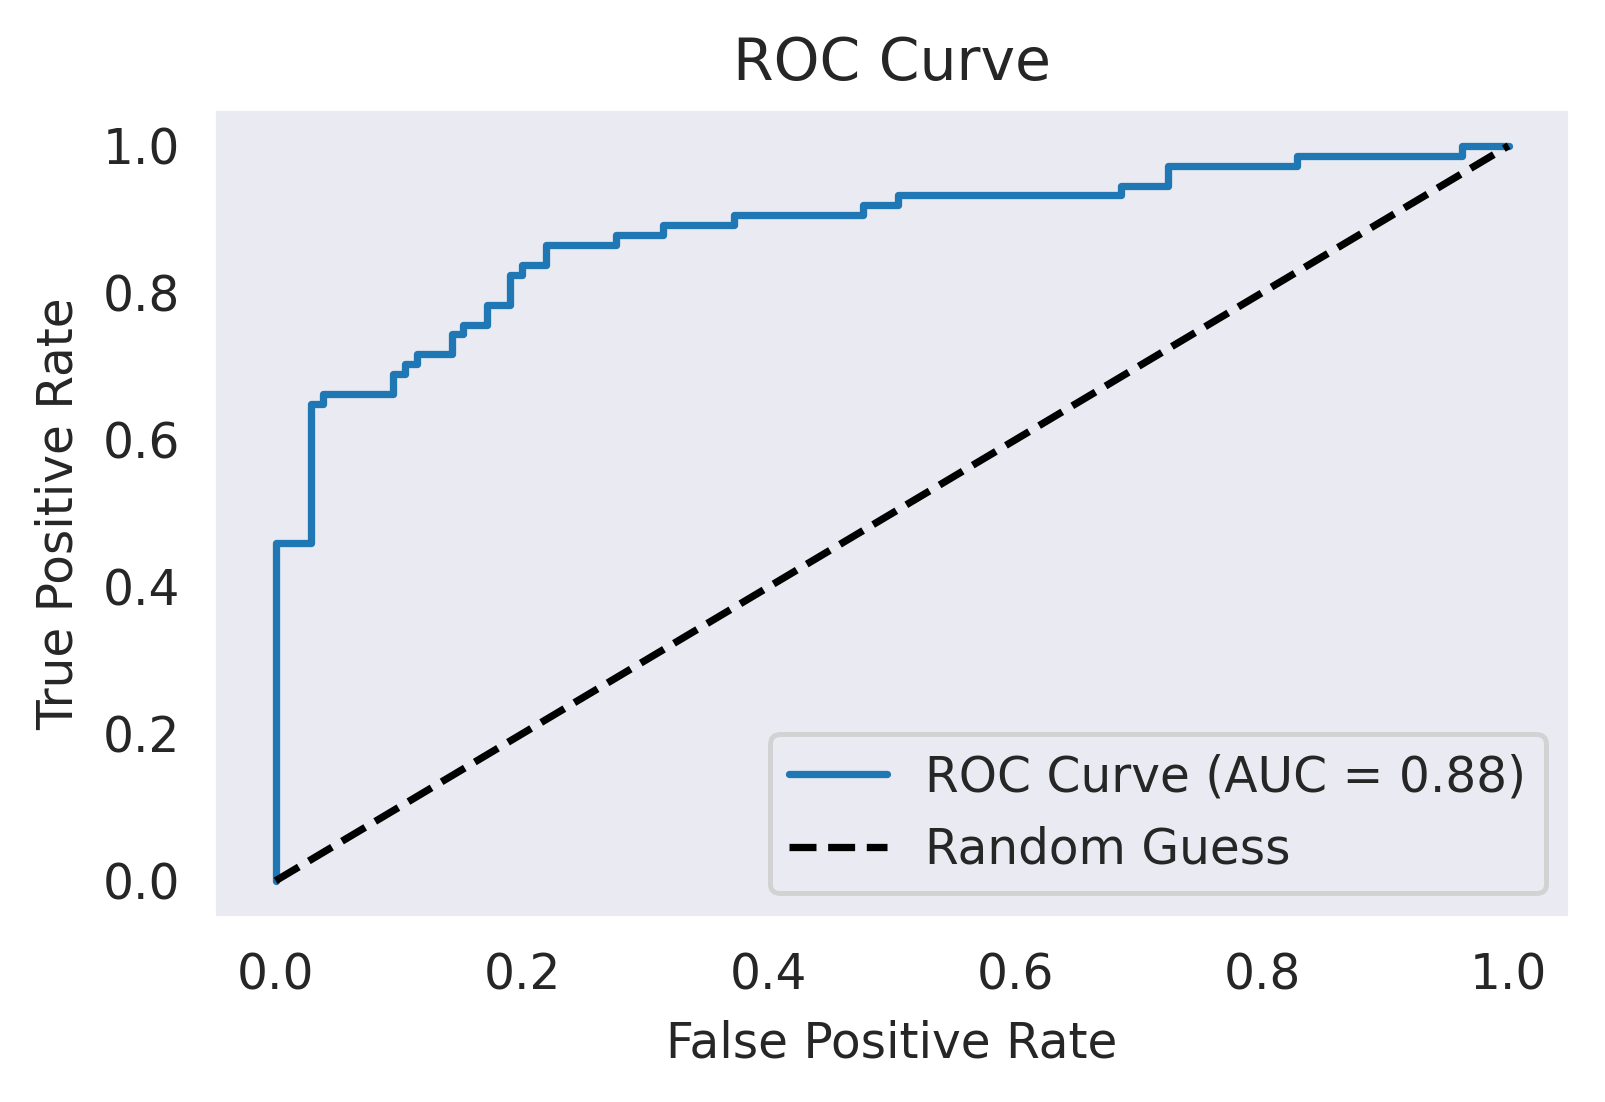

In [140]:
# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(5, 3))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

In [141]:
t_X.head()

Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
418       2    1  30.0      0      0  13.0000         2
419       3    0  10.0      0      2  24.1500         2
420       3    1  28.0      0      0   7.8958         0
421       3    1  21.0      0      0   7.7333         1
422       3    1  29.0      0      0   7.8750         2

In [142]:
t_X.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

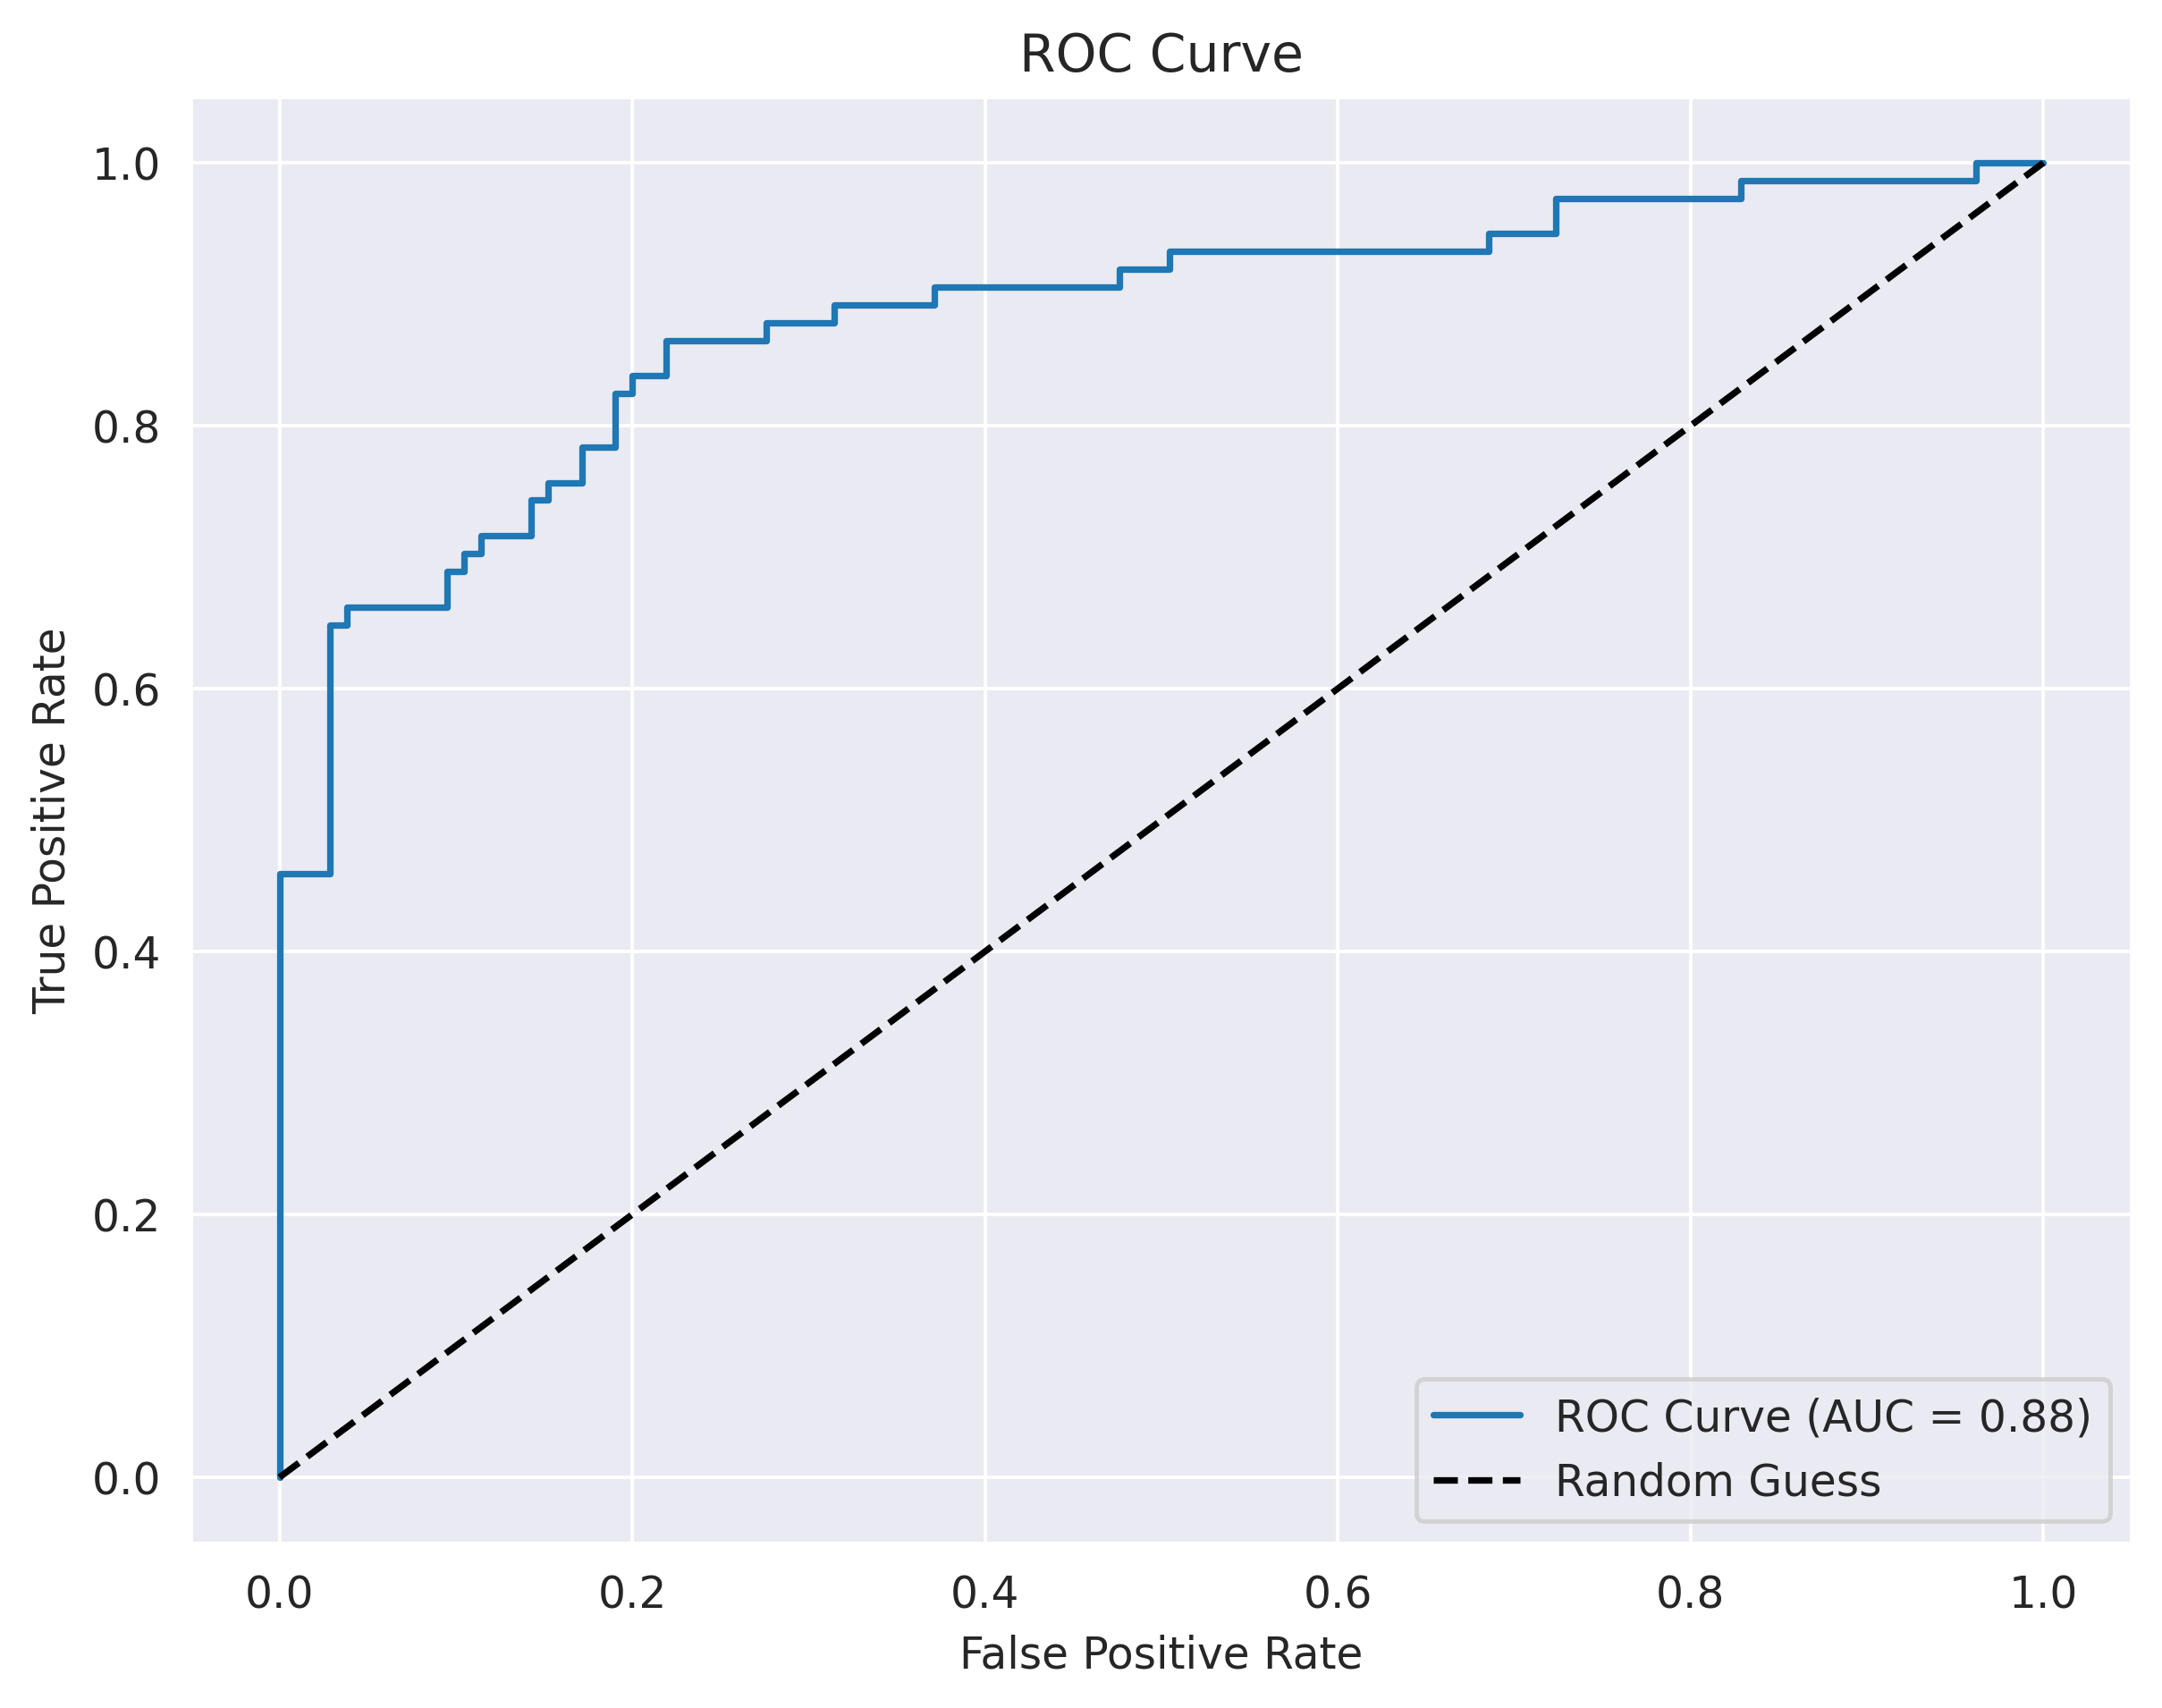

In [144]:
# Evaluate the model on the testing data
y_test_pred = logistic_model.predict(t_X)
y_test_pred_proba = logistic_model.predict_proba(t_X)[:, 1]

# Generate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Visualize the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

#5. Interpretation:

a. Interpret the coefficients of the logistic regression model.

In [145]:
# Interpret coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': logistic_model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print(coefficients)

    Feature  Coefficient
5      Fare     0.002534
2       Age    -0.030433
4     Parch    -0.111851
6  Embarked    -0.218777
3     SibSp    -0.293906
0    Pclass    -0.930680
1       Sex    -2.596995


*b. Discuss the significance of features in predicting the target variable (survival probability in this case).*

**Sex:** Being female is the most critical predictor of survival.

**Pclass:** Wealth and class status significantly influenced access to lifeboats, making this feature a strong predictor.

**Fare:** higher fares correlate with better survival chances.

**Age:** Younger passengers had higher survival odds, consistent with prioritizing children.

Family Size (**SibSp and Parch**): Family size influences evacuation ease; smaller families had higher survival rates.

**Embarked:** This indicates regional or socioeconomic factors but is less influential than other features.

#6. Deployment with Streamlit:

In [146]:
!pip install streamlit

In [147]:
import joblib

# Save the trained model
joblib.dump(logistic_model, 'logistic_model.pkl')

['logistic_model.pkl']

In [148]:
titanic_data.describe()

Survived      Pclass         Sex         Age       SibSp       Parch  \
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000   
mean     0.383838    2.308642    0.647587   29.361582    0.523008    0.381594   
std      0.486592    0.836071    0.477990   13.019697    1.102743    0.806057   
min      0.000000    1.000000    0.000000    0.420000    0.000000    0.000000   
25%      0.000000    2.000000    0.000000   22.000000    0.000000    0.000000   
50%      0.000000    3.000000    1.000000   28.000000    0.000000    0.000000   
75%      1.000000    3.000000    1.000000   35.000000    1.000000    0.000000   
max      1.000000    3.000000    1.000000   80.000000    8.000000    6.000000   

             Fare    Embarked  
count  891.000000  891.000000  
mean    32.204208    1.536476  
std     49.693429    0.791503  
min      0.000000    0.000000  
25%      7.910400    1.000000  
50%     14.454200    2.000000  
75%     31.000000    2.000000  
max    512.329200    2.000000

#Interview Questions:


**1. What is the difference between precision and recall?**

precision: It focus in measuring how accurate a model's positive predictions are

Ex: in spam detection, where incorrectly classifying legitimate emails as spam can be problematic

recall: It focus in measuring how well a model can find all the positive instances

Ex: in medical diagnoses, where failing to detect a disease could have serious consequences.

**2. What is cross-validation, and why is it important in binary classification?**

Cross-validation is a statistical technique used to assess the predictive performance of a machine learning model.It involves splitting the dataset into multiple subsets (or folds) and training & testing the model on these subsets in a systematic way.

*   to prevents the overfitting to the train the model.
*   It helps in reliable performance estimation
*   it is used to choose the one that performs best on average across different models.
*   It handels data imbalance







